In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy import stats


In [21]:
#Load iris dataset
iris = load_iris()

df = pd.DataFrame(
    iris.data,
    columns=["sepal_length", "sepal_width", "petal_length", "petal_width"]
)

df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 1. Descriptive Statistics

In [22]:
desc_stats = df.groupby("species")["sepal_length"].agg(
    mean="mean",
    median="median",
    std="std"
)

desc_stats


/tmp/ipython-input-972419258.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc_stats = df.groupby("species")["sepal_length"].agg(


,mean,median,std
species,,,
setosa,5.006,5.0,0.352490
versicolor,5.936,5.9,0.516171
virginica,6.588,6.5,0.635880


In [23]:
highest_variability = desc_stats["std"].idxmax()
highest_variability


'virginica'

Interpretation : Virginica shows the highest variability in sepal length, indicating greater spread in measurements compared to other species.


# 2. Central Tendency & Dispersion

In [24]:
petal_stats = df.groupby("species")["petal_length"].agg(
    mean="mean",
    median="median",
    variance="var",
    std="std"
)

petal_stats


/tmp/ipython-input-1076903241.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  petal_stats = df.groupby("species")["petal_length"].agg(


,mean,median,variance,std
species,,,,
setosa,1.462,1.50,0.030159,0.173664
versicolor,4.260,4.35,0.220816,0.469911
virginica,5.552,5.55,0.304588,0.551895


In [25]:
modes = df.groupby("species")["petal_length"].apply(
    lambda x: stats.mode(x, keepdims=True).mode[0]
)

modes


/tmp/ipython-input-3919659999.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  modes = df.groupby("species")["petal_length"].apply(


,petal_length
species,
setosa,1.4
versicolor,4.5
virginica,5.1


Explanation : The median differs from the mean when the data is skewed or contains outliers, as the mean is more sensitive to extreme values.


# 3. Visualization

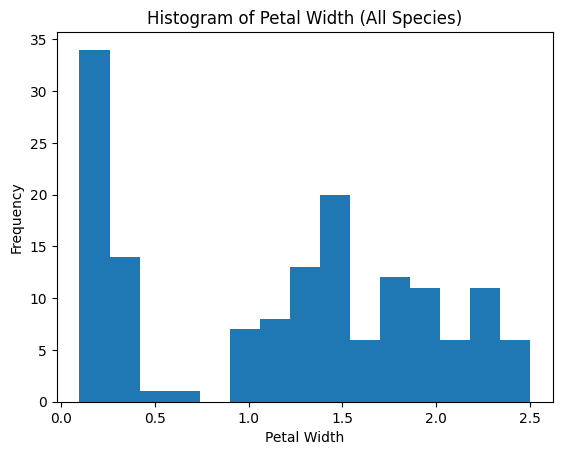

In [26]:
#Histogram
plt.hist(df["petal_width"], bins=15)
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.title("Histogram of Petal Width (All Species)")
plt.show()


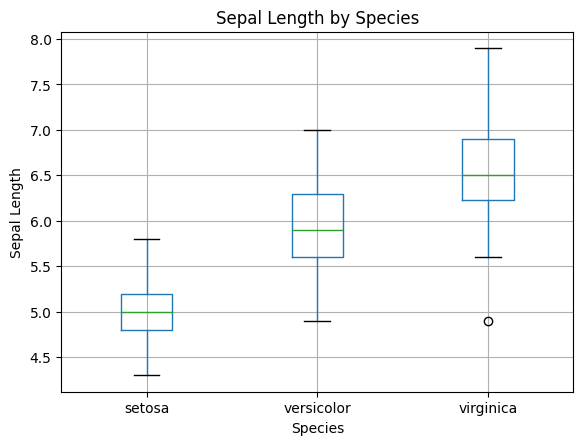

In [27]:
#Boxplot
df.boxplot(column="sepal_length", by="species")
plt.title("Sepal Length by Species")
plt.suptitle("")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.show()


The boxplot better shows between-species differences because it clearly compares medians, spread, and outliers across species.

# 4. Distributions & Skewness

In [28]:
skewness = df.groupby("species")["petal_length"].apply(stats.skew)
skewness


/tmp/ipython-input-1182802627.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  skewness = df.groupby("species")["petal_length"].apply(stats.skew)


,petal_length
species,
setosa,0.103175
versicolor,-0.588159
virginica,0.532822


In [29]:
most_positive = skewness.idxmax()
most_negative = skewness.idxmin()

most_positive, most_negative


('virginica', 'versicolor')

Interpretation : Positive skew indicates a longer right tail, while negative skew indicates a longer left tail. Species differ in petal length symmetry.

# 5. Sampling & Central Limit Theorem

In [30]:
np.random.seed(42)

population = df["sepal_length"]
sample_means = []

for _ in range(100):
    sample = np.random.choice(population, size=20, replace=True)
    sample_means.append(sample.mean())


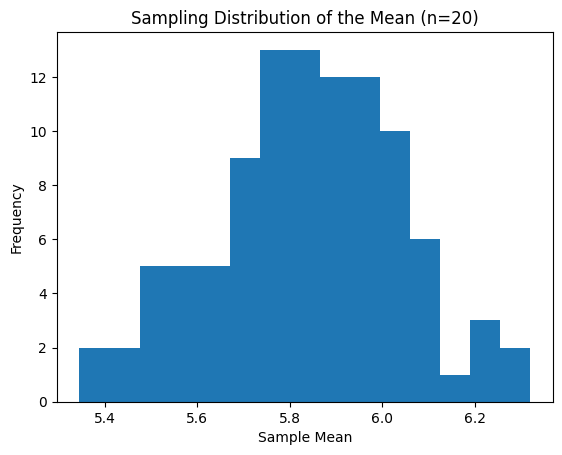

In [31]:
#Histogram – Sample Means
plt.hist(sample_means, bins=15)
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Sampling Distribution of the Mean (n=20)")
plt.show()


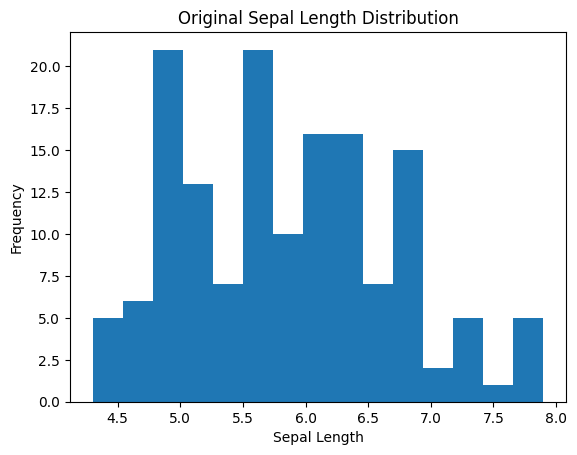

In [32]:
#Histogram – Original Data
plt.hist(population, bins=15)
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Original Sepal Length Distribution")
plt.show()


Comparison : The sampling distribution is more normal and concentrated around the mean, demonstrating the Central Limit Theorem.

# 6. Correlation

In [33]:
r, p = stats.pearsonr(df["sepal_length"], df["petal_length"])
r, p


(np.float64(0.8717537758865831), np.float64(1.0386674194498771e-47))

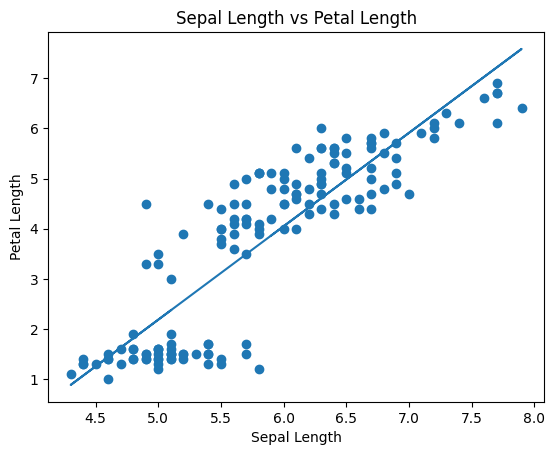

In [34]:
#Scatter Plot with Best-Fit Line
plt.scatter(df["sepal_length"], df["petal_length"])
m, b = np.polyfit(df["sepal_length"], df["petal_length"], 1)
plt.plot(df["sepal_length"], m*df["sepal_length"] + b)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Sepal Length vs Petal Length")
plt.show()


Result : The relationship is positive, meaning petal length increases as sepal length increases.

# 7. Hypothesis Testing: t-Test (2 Groups)

In [35]:
setosa = df[df["species"] == "setosa"]["petal_length"]
versicolor = df[df["species"] == "versicolor"]["petal_length"]

t_stat, p_val = stats.ttest_ind(setosa, versicolor)
t_stat, p_val


(np.float64(-39.492719391538095), np.float64(5.404910513441677e-62))

Conclusion : Since the p-value is less than 0.05, we reject the null hypothesis and conclude that the mean petal lengths differ significantly.

# 8. Hypothesis Testing: ANOVA (3 Groups)

In [36]:
virginica = df[df["species"] == "virginica"]["petal_width"]

f_stat, p_val = stats.f_oneway(setosa, versicolor, virginica)
f_stat, p_val


(np.float64(1006.2291234212867), np.float64(1.672940395623648e-86))

Conclusion : The ANOVA test shows a statistically significant difference in petal width across species.